In [50]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

### Loading and Cleaning Data

In [51]:
data = pd.read_csv('SYB65_310_202209_Carbon Dioxide Emission Estimates.csv')

In [52]:
data.head()

,T27,CO2 emission estimates,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,Region/Country/Area,NaN,Year,Series,Value,Footnotes,Source
1,8,Albania,1975,Emissions (thousand metric tons of carbon diox...,"4,524",NaN,"International Energy Agency, IEA World Energy ..."
2,8,Albania,1985,Emissions (thousand metric tons of carbon diox...,"7,145",NaN,"International Energy Agency, IEA World Energy ..."
3,8,Albania,2005,Emissions (thousand metric tons of carbon diox...,"3,981",NaN,"International Energy Agency, IEA World Energy ..."
4,8,Albania,2010,Emissions (thousand metric tons of carbon diox...,"4,074",NaN,"International Energy Agency, IEA World Energy ..."


In [53]:
data.shape

(2203, 7)

In [54]:
data1 = data.drop(data.columns[[0,-2,-1]], axis=1)

In [55]:
data1.head()

,CO2 emission estimates,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,NaN,Year,Series,Value
1,Albania,1975,Emissions (thousand metric tons of carbon diox...,"4,524"
2,Albania,1985,Emissions (thousand metric tons of carbon diox...,"7,145"
3,Albania,2005,Emissions (thousand metric tons of carbon diox...,"3,981"
4,Albania,2010,Emissions (thousand metric tons of carbon diox...,"4,074"


In [56]:
data1.shape

(2203, 4)

In [57]:
data2 = data1.drop(data1.index[0], axis=0)

In [58]:
data2.columns = ['Region/Country/Area', 'Year', 'Series', 'Value']

In [59]:
data2.head()

,Region/Country/Area,Year,Series,Value
1,Albania,1975,Emissions (thousand metric tons of carbon diox...,"4,524"
2,Albania,1985,Emissions (thousand metric tons of carbon diox...,"7,145"
3,Albania,2005,Emissions (thousand metric tons of carbon diox...,"3,981"
4,Albania,2010,Emissions (thousand metric tons of carbon diox...,"4,074"
5,Albania,2015,Emissions (thousand metric tons of carbon diox...,"3,979"


In [60]:
data2.dropna(inplace=True)
data2.shape

(2202, 4)

### Exploratory Data Analysis 

In [61]:
unique_strings = data2['Series'].unique()
print(unique_strings)

['Emissions (thousand metric tons of carbon dioxide)'
 'Emissions per capita (metric tons of carbon dioxide)']


In [62]:
# Select rows where 'Series' column is 'Emissions (thousand metric tons of carbon dioxide)'
emission_data = data2.query("Series == 'Emissions (thousand metric tons of carbon dioxide)'") # Reference : https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.query.html

# Remove the last two columns and reset the index
emission_data = emission_data.drop(data2.columns[-2], axis=1).reset_index(drop=True)

In [63]:
emission_data.head()

,Region/Country/Area,Year,Value
0,Albania,1975,"4,524"
1,Albania,1985,"7,145"
2,Albania,2005,"3,981"
3,Albania,2010,"4,074"
4,Albania,2015,"3,979"


In [64]:
# Select rows where 'Series' column is 'Emissions per capita (metric tons of carbon dioxide)'
emission_per_capita_data = data2.query("Series == 'Emissions per capita (metric tons of carbon dioxide)'") 

# Remove the last two columns and reset the index
emission_per_capita_data = emission_per_capita_data.drop(data2.columns[-2], axis=1).reset_index(drop=True)

In [65]:
emission_per_capita_data.head()

,Region/Country/Area,Year,Value
0,Albania,1975,1.8
1,Albania,1985,2.3
2,Albania,2005,1.3
3,Albania,2010,1.4
4,Albania,2015,1.3


## Data Cleaning and Preprocessing for Emission Data 

In [66]:
print(emission_data['Value'].dtype)

object


In [67]:
emission_data['Value'] = emission_data['Value'].str.replace(',', '').astype(int) # Reference : https://pandas.pydata.org/docs/reference/api/pandas.Series.str.replace.html

In [68]:
emission_data['Value'].dtype

dtype('int32')

In [69]:
emission_data['Value']

0        4524
1        7145
2        3981
3        4074
4        3979
        ...  
1095    11753
1096    14514
1097    12386
1098    14480
1099    13882
Name: Value, Length: 1100, dtype: int32

In [70]:
emission_data['Year'] = emission_data['Year'].astype(int)

In [71]:
emission_data['Year']

0       1975
1       1985
2       2005
3       2010
4       2015
        ... 
1095    2010
1096    2015
1097    2017
1098    2018
1099    2019
Name: Year, Length: 1100, dtype: int32

### Time Series Analysis 

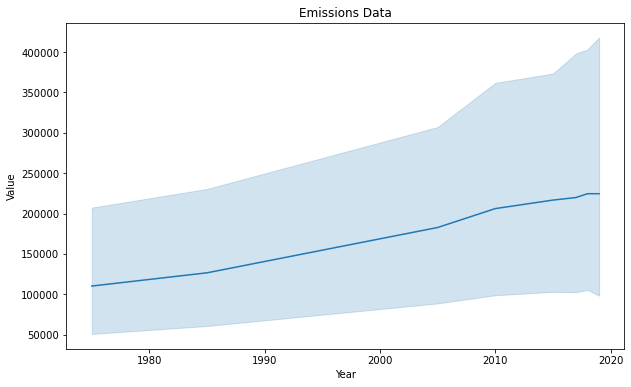

In [72]:
plt.figure(figsize=(10,6))

# seaborn's lineplot function to plot the 'Value' column against the 'Year' column
sns.lineplot(x='Year', y='Value', data=emission_data)  
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Emissions Data')
plt.show()

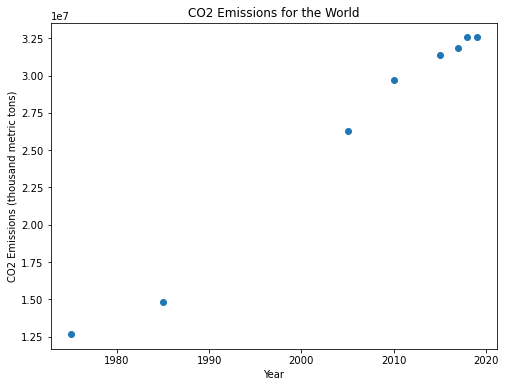

In [73]:
# Create a dataframe for the total CO2 emissions for the world by year
world_data = emission_data.groupby('Year')['Value'].sum().reset_index() # Reference : https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html

# Create a scatter plot to visualize the CO2 emissions for the world over time
plt.figure(figsize=(8,6))
plt.scatter(world_data['Year'], world_data['Value'])
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (thousand metric tons)')
plt.title('CO2 Emissions for the World')
plt.show()

### Exploring Emissions by Country 

<ipython-input-74-6d7702b457c4>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(tick_labels)


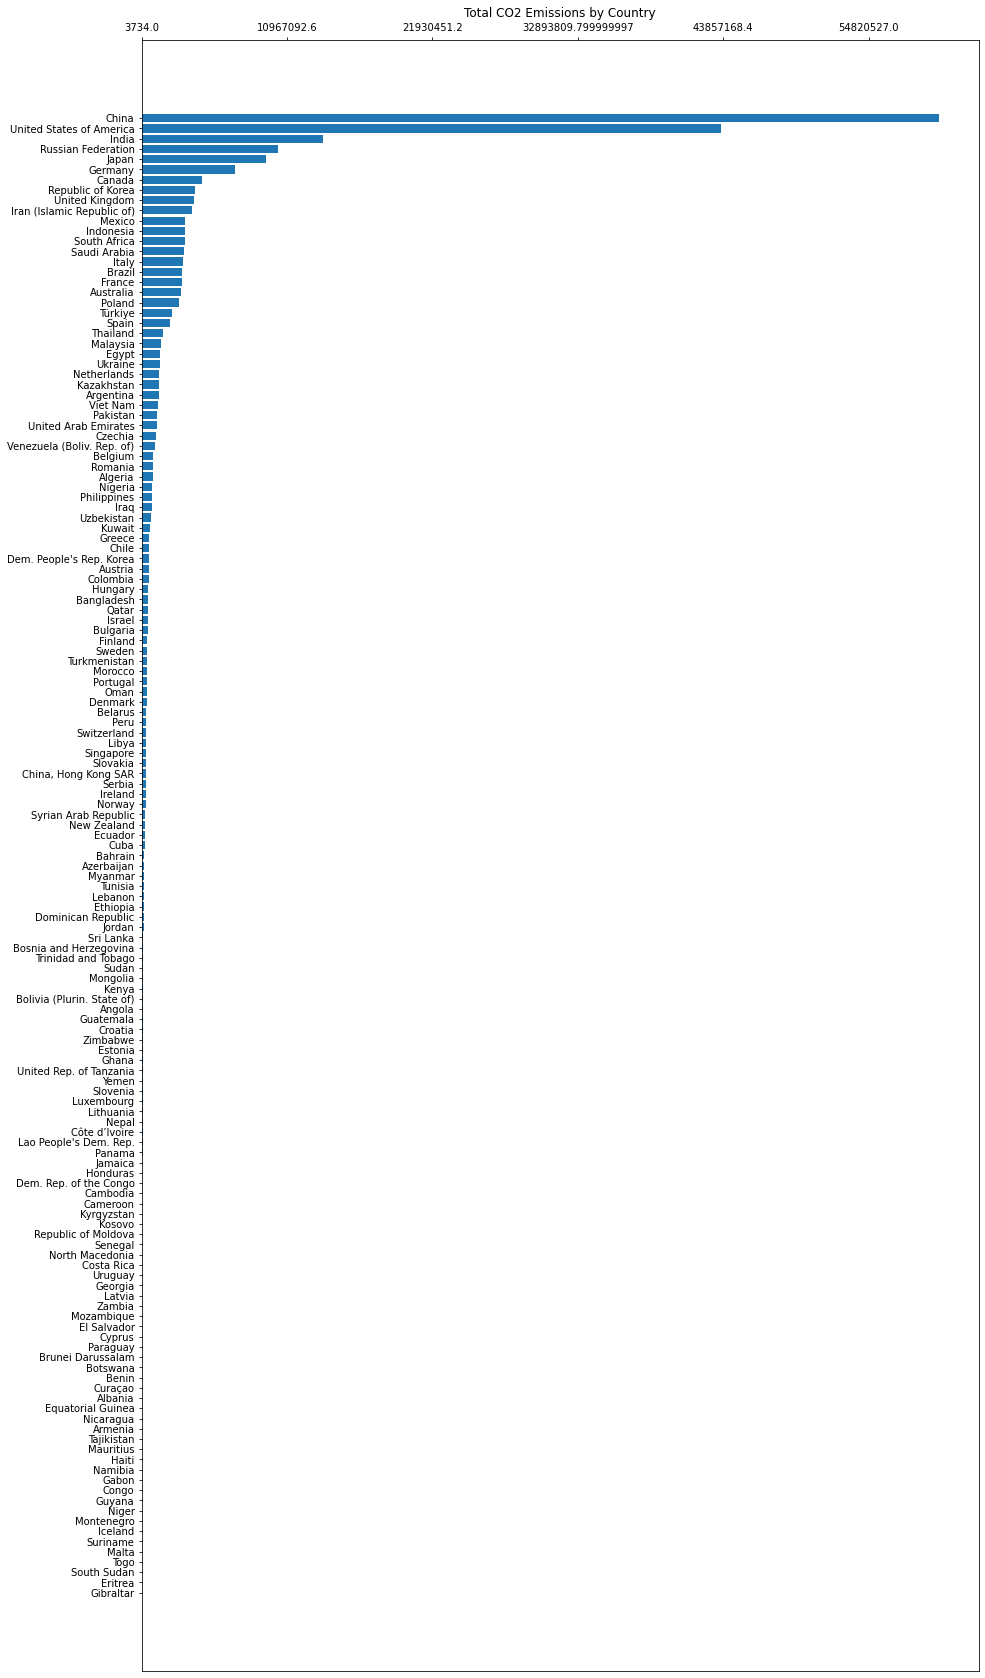

In [74]:
# Sort the countries by total emissions in ascending order
emission_data_grouped = emission_data.groupby('Region/Country/Area')['Value'].sum()
emission_data_grouped.sort_values(ascending=True, inplace=True) # Reference : https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html

plt.figure(figsize=(15,30))
plt.barh(emission_data_grouped.index, emission_data_grouped.values)
plt.title('Total CO2 Emissions by Country')

# Add tick labels to the x-axis with evenly spaced intervals between the minimum and maximum emissions
tick_labels = np.linspace(emission_data_grouped.min(), emission_data_grouped.max(), 6)
plt.gca().set_xticklabels(tick_labels)

# Set the position of the x-axis ticks to be on top of the plot
plt.gca().xaxis.set_ticks_position('top')

plt.show()

### Visualizing Emissions by Country using Heatmap 

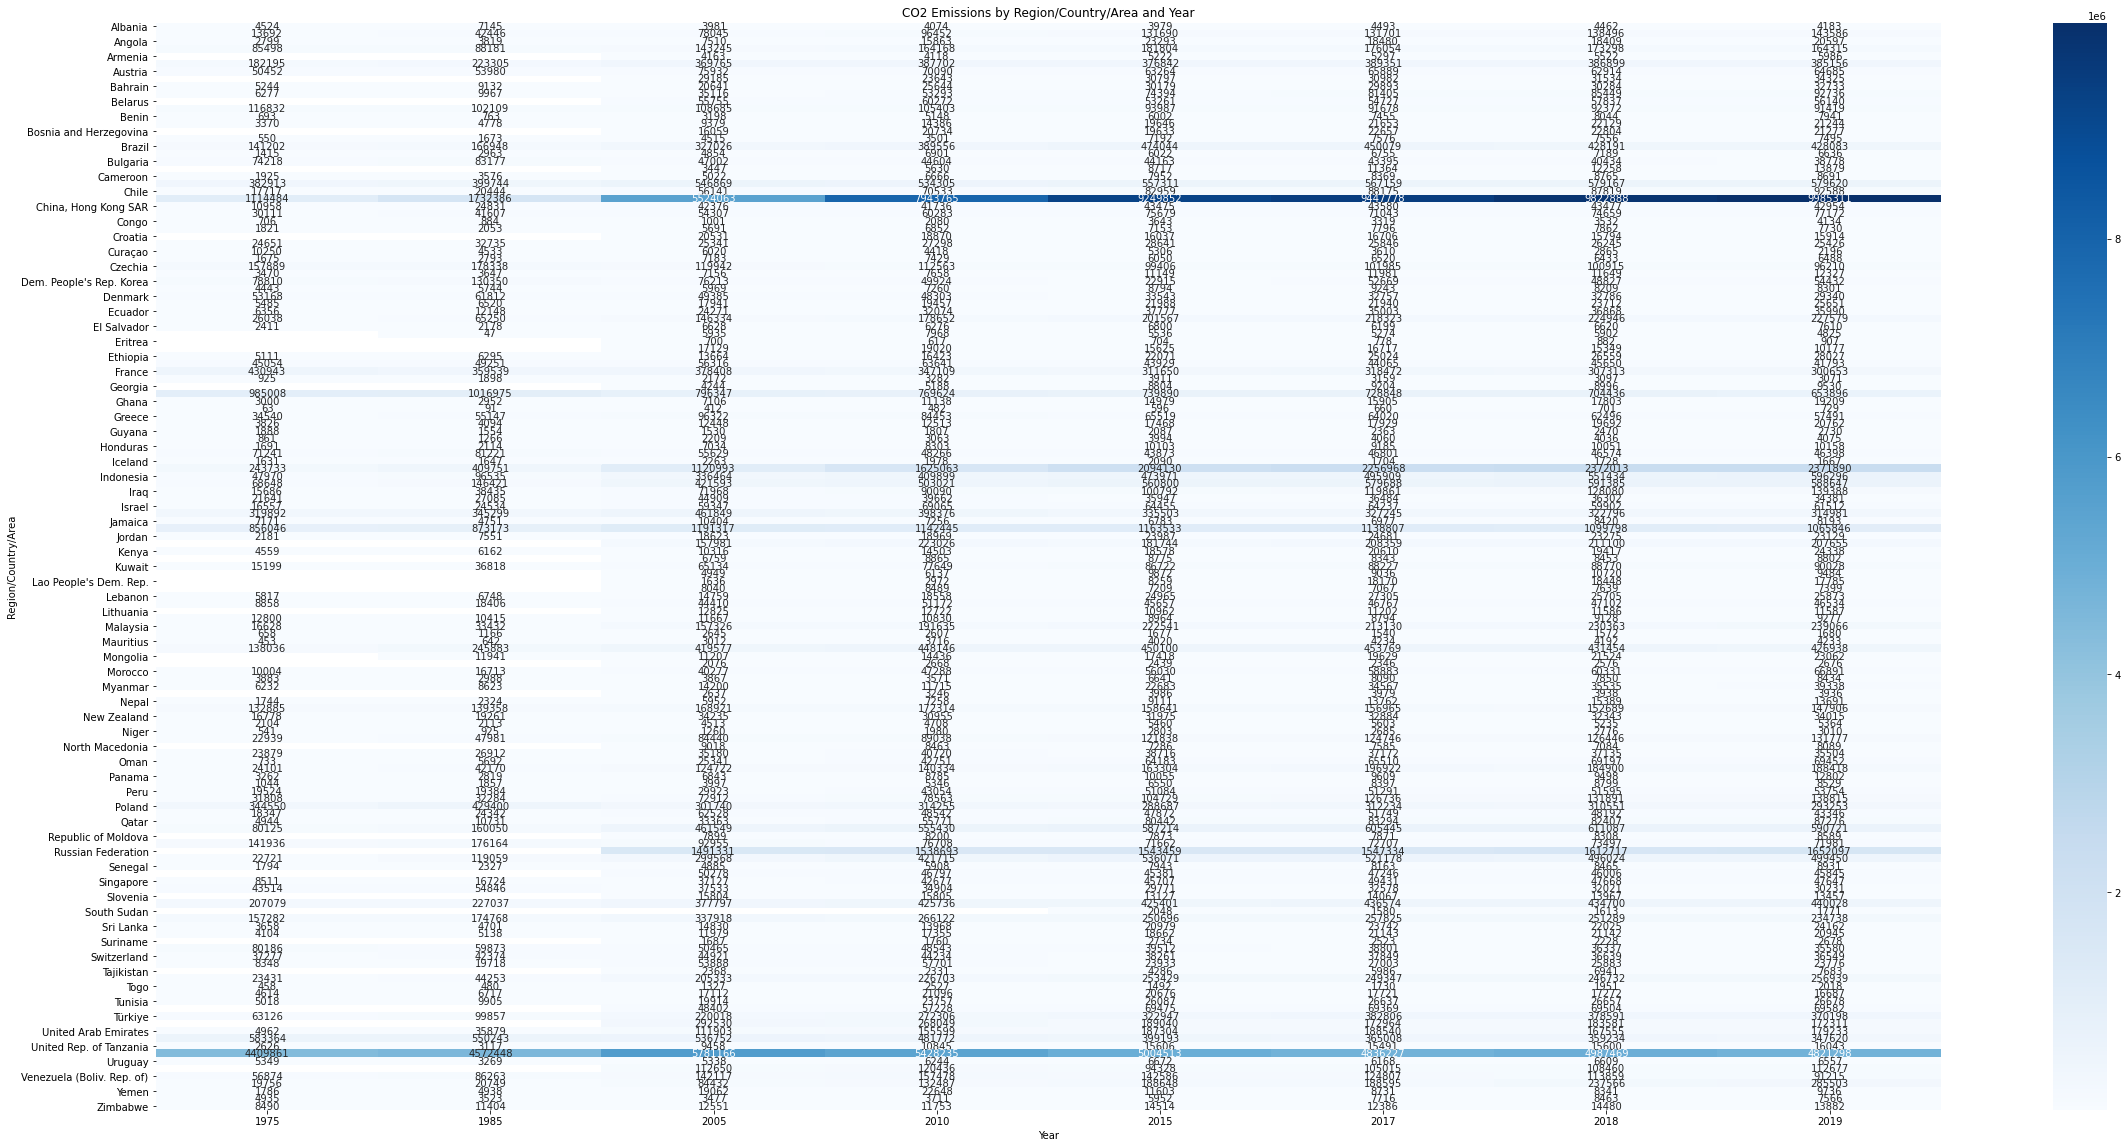

In [75]:
# Create a pivot table of the emission data
emission_data_pivot = emission_data.pivot_table(values='Value', index='Region/Country/Area', columns='Year')

# Create a heatmap of the pivot table
plt.figure(figsize=(40, 20))
sns.heatmap(emission_data_pivot, cmap='Blues', annot=True, fmt='.0f')
plt.xlabel('Year')
plt.ylabel('Region/Country/Area')
plt.title('CO2 Emissions by Region/Country/Area and Year')
plt.show()

### Visualizing Emissions by Country using Boxplot 

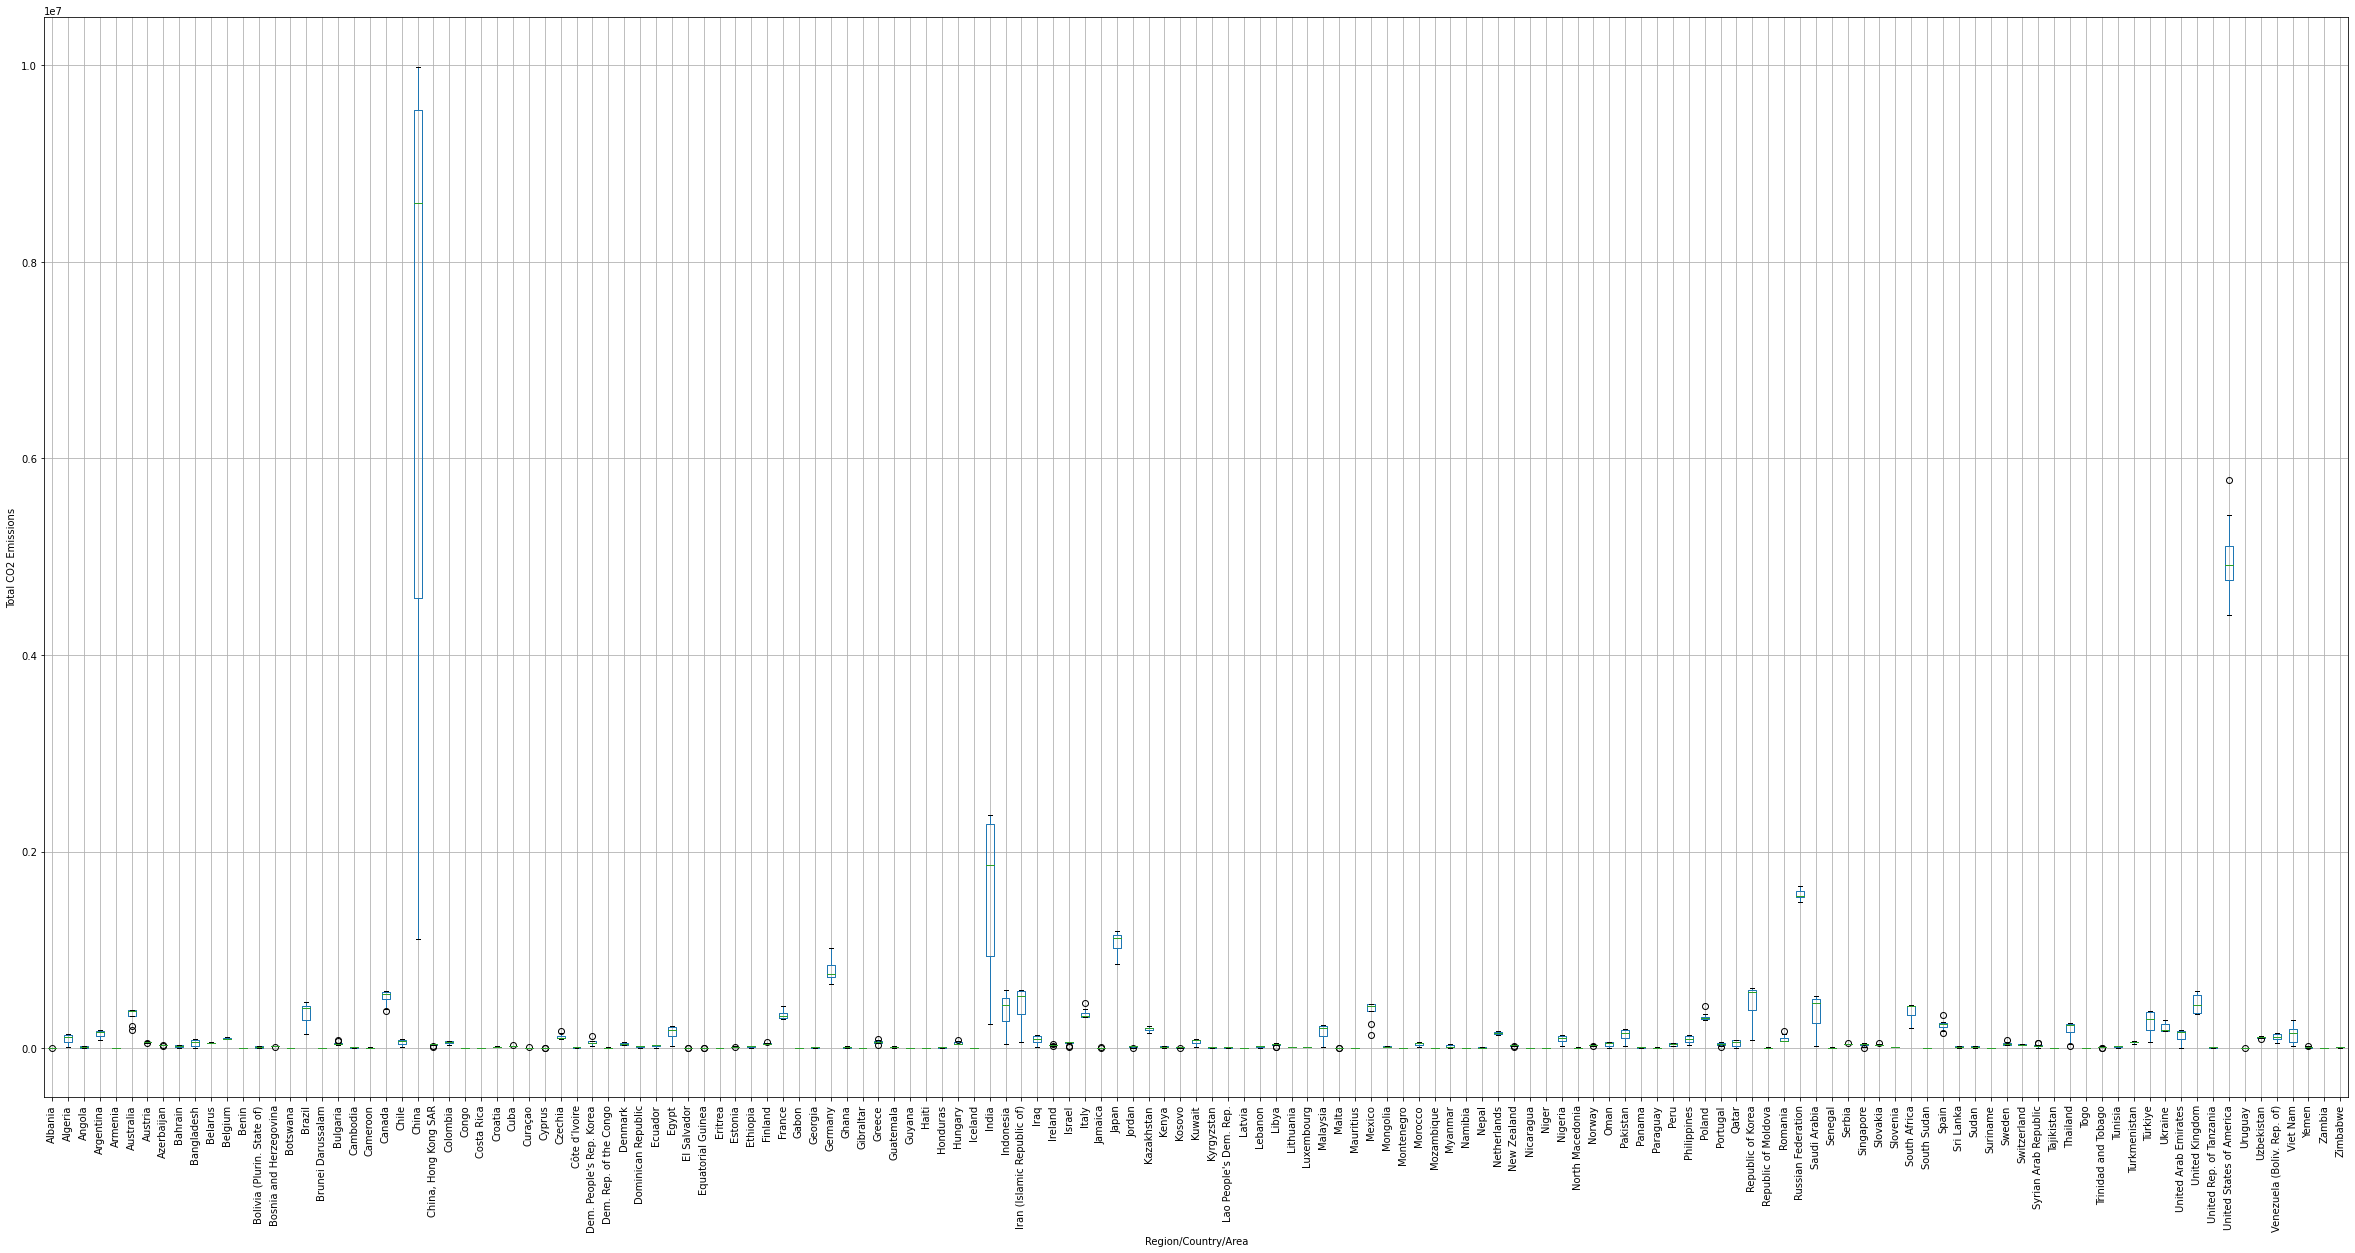

In [76]:
plt.figure(figsize=(40, 20))
ax = plt.gca()

# Create a boxplot of the 'Value' column, grouped by 'Region/Country/Area'
emission_data.boxplot(column='Value', by='Region/Country/Area', ax=ax, rot=90)
plt.ylabel('Total CO2 Emissions')
plt.title('')
plt.suptitle('')
plt.show()

### Function to Plot Emissions of a Specific Country 

In [77]:
# Select the data for a specific country
def plot_country_emissions(country_name):
    country_data = emission_data[emission_data['Region/Country/Area'] == country_name]

    # Create a line plot of the data
    plt.plot(country_data['Year'], country_data['Value'])
    plt.xlabel('Year')
    plt.ylabel('CO2 Emissions (thousand metric tons)')
    plt.title(f'CO2 Emissions for {country_name}')
    plt.show()

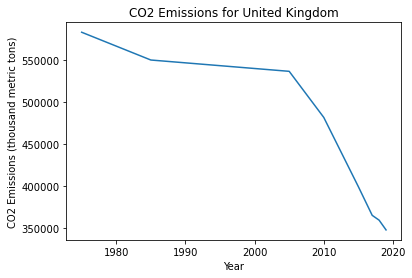

In [78]:
plot_country_emissions('United Kingdom')

### Visualizing CO2 Emissions of Top 10 Countries 

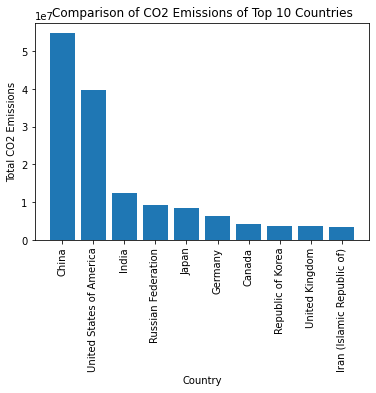

In [79]:
# Group the data by country and calculate the total emissions for each country
emission_data_grouped = emission_data.groupby('Region/Country/Area')['Value'].sum()

# Sort the countries by total emissions
emission_data_grouped = emission_data_grouped.sort_values(ascending=False) 

# Select the top N countries to compare
top_10_countries = emission_data_grouped.head(10)

# Create a bar plot
plt.bar(top_10_countries.index, top_10_countries.values)
plt.xlabel('Country')
plt.ylabel('Total CO2 Emissions')
plt.title('Comparison of CO2 Emissions of Top 10 Countries')
plt.xticks(rotation = 90)
plt.show()

### Visualizing Maximum CO2 Emission Growth Rate of Top 10 Countries in the Last 5 Years 

In [80]:
# Add column for 5-year growth rate
emission_data['5-year Growth Rate'] = emission_data.groupby('Region/Country/Area')['Value'].pct_change(periods=5) # Reference : https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pct_change.html

# Group the data by 'Region/Country/Area' and get the max growth rate
emission_data_grouped = emission_data.groupby('Region/Country/Area')['5-year Growth Rate'].max()

# Sort the data in descending order
emission_data_grouped.sort_values(ascending=False, inplace=True)  

# Get the top 10 countries with the highest growth rate
top_10_rapid_growth_rate = emission_data_grouped.head(10)
top_10_rapid_growth_rate

Region/Country/Area
Equatorial Guinea       124.574468
Oman                     88.372442
United Arab Emirates     36.996775
Saudi Arabia             21.938163
Qatar                    15.847492
Botswana                 12.774545
Bangladesh               11.968775
Malaysia                 11.817537
Viet Nam                 10.449516
Jordan                   10.316369
Name: 5-year Growth Rate, dtype: float64

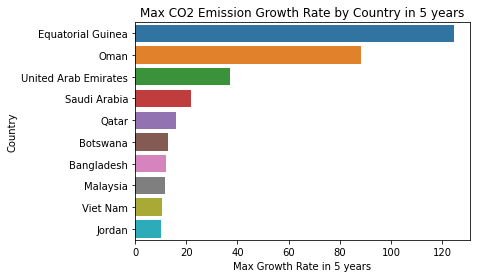

In [81]:
# Create a horizontal bar plot of the top 10 countries
sns.barplot(y=top_10_rapid_growth_rate.index, x=top_10_rapid_growth_rate.values, orient='h')
plt.xlabel('Max Growth Rate in 5 years')
plt.ylabel('Country')
plt.title('Max CO2 Emission Growth Rate by Country in 5 years')
plt.show()


### Visualizing Minimum CO2 Emission Shrinkage Rate of Top 10 Countries in the Last 5 Years 

In [82]:
# Add column for 5-year shrinkage rate
emission_data['5-year Shrinkage Rate'] = emission_data.groupby('Region/Country/Area')['Value'].pct_change(periods=5) * -1

# Group the data by 'Region/Country/Area' and get the min shrinkage rate
emission_data_grouped = emission_data.groupby('Region/Country/Area')['5-year Shrinkage Rate'].apply(lambda x: x.abs().min())

# Sort the data in ascending order
emission_data_grouped.sort_values(inplace=True) 

# Get the top 10 countries with the lowest shrinkage rate
top_10_rapid_shrinkage_rate = emission_data_grouped.head(10)
top_10_rapid_shrinkage_rate

Region/Country/Area
Uzbekistan              0.000240
Cuba                    0.003354
New Zealand             0.006426
Albania                 0.006852
Belarus                 0.006905
Norway                  0.009210
China, Hong Kong SAR    0.013640
Switzerland             0.015345
Mexico                  0.017544
Finland                 0.021951
Name: 5-year Shrinkage Rate, dtype: float64

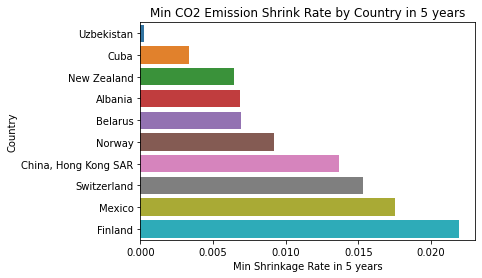

In [83]:
# Create a horizontal bar plot of the top 10 countries
sns.barplot(y=top_10_rapid_shrinkage_rate.index, x=top_10_rapid_shrinkage_rate.values, orient='h')
plt.xlabel('Min Shrinkage Rate in 5 years')
plt.ylabel('Country')
plt.title('Min CO2 Emission Shrink Rate by Country in 5 years')
plt.show()

## Data Cleaning and Preprocessing for Emission per Capita Data 

In [84]:
emission_per_capita_data

,Region/Country/Area,Year,Value
0,Albania,1975,1.8
1,Albania,1985,2.3
2,Albania,2005,1.3
3,Albania,2010,1.4
4,Albania,2015,1.3
...,...,...,...
1097,Zimbabwe,2010,0.7
1098,Zimbabwe,2015,0.9
1099,Zimbabwe,2017,0.7
1100,Zimbabwe,2018,0.8


In [85]:
print(emission_per_capita_data['Value'].dtype)

object


In [86]:
emission_per_capita_data['Value'] = emission_per_capita_data['Value'].astype(float)

In [87]:
emission_per_capita_data['Value']

0       1.8
1       2.3
2       1.3
3       1.4
4       1.3
       ... 
1097    0.7
1098    0.9
1099    0.7
1100    0.8
1101    0.8
Name: Value, Length: 1102, dtype: float64

###  Exploring Emission per Capita by Country  

<ipython-input-88-4d0b11df4174>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(tick_labels)


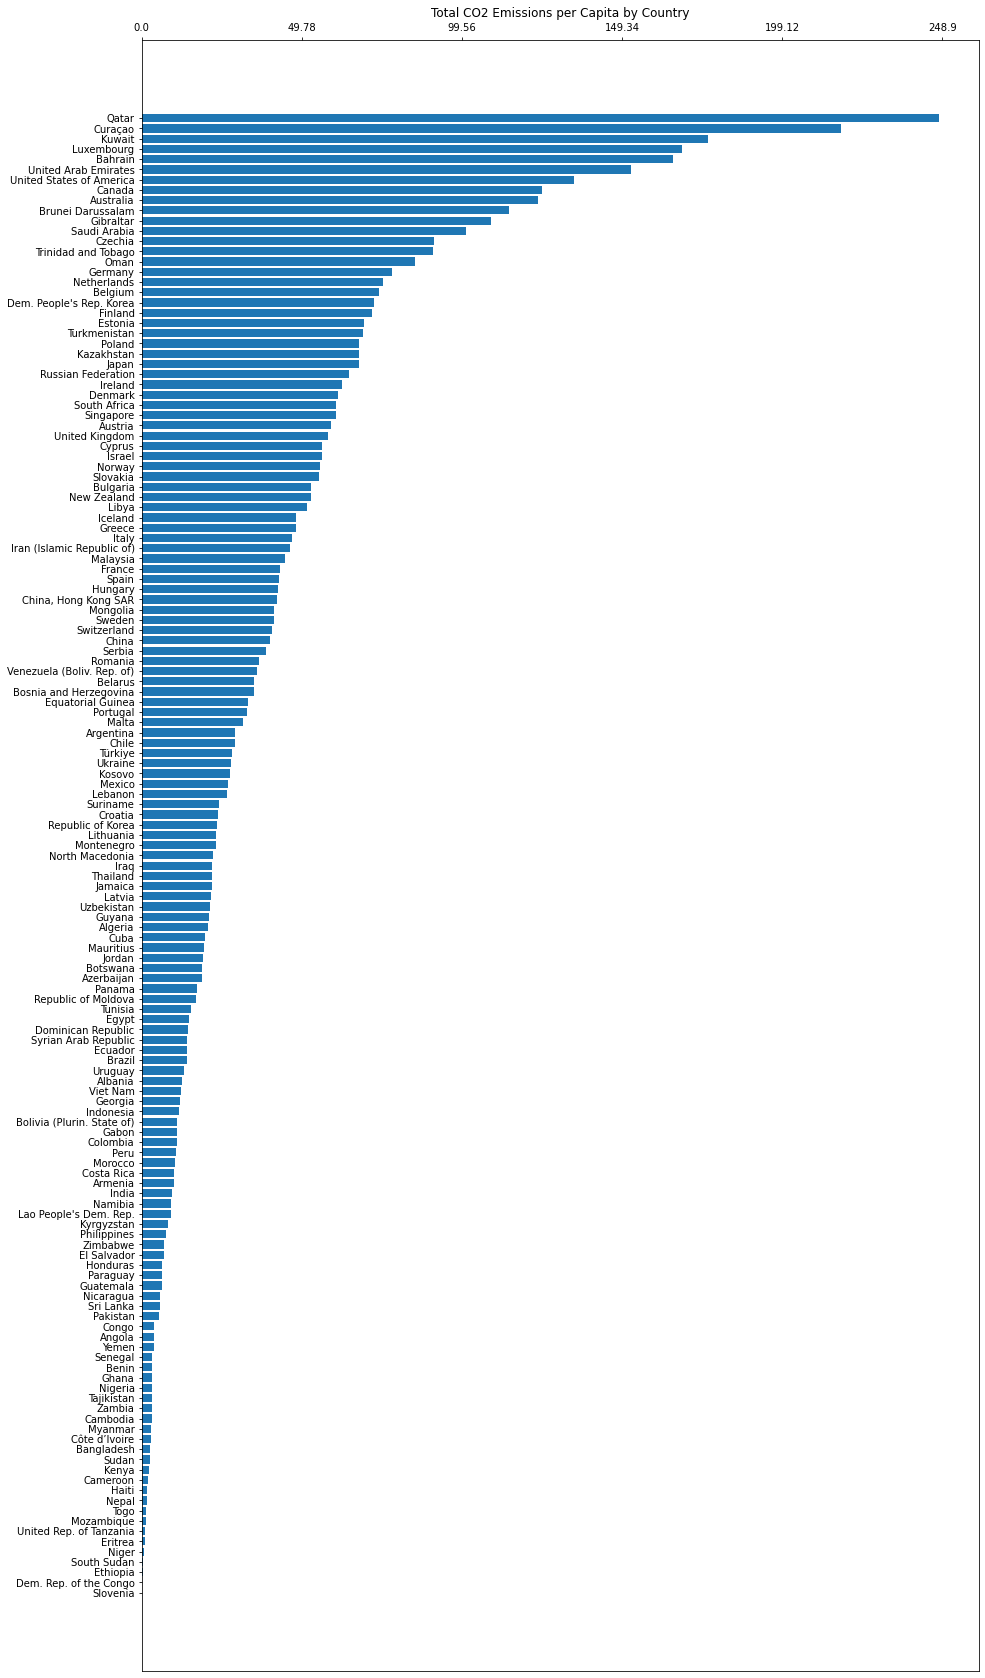

In [88]:
# Group the data by 'Region/Country/Area' and get the sum of emissions per capita
emission_per_capita_data_grouped = emission_per_capita_data.groupby('Region/Country/Area')['Value'].sum()

# Sort the data in ascending order
emission_per_capita_data_grouped.sort_values(ascending=True, inplace=True)

# Create a horizontal bar plot of the data
plt.figure(figsize=(15,30))
plt.barh(emission_per_capita_data_grouped.index, emission_per_capita_data_grouped.values)
plt.title('Total CO2 Emissions per Capita by Country')

# Add tick labels
tick_labels = np.linspace(emission_per_capita_data_grouped.min(), emission_per_capita_data_grouped.max(), 6)
tick_labels = np.round(tick_labels, 2)
plt.gca().set_xticklabels(tick_labels)

# Move the x-axis ticks to the top
plt.gca().xaxis.set_ticks_position('top')

plt.show()

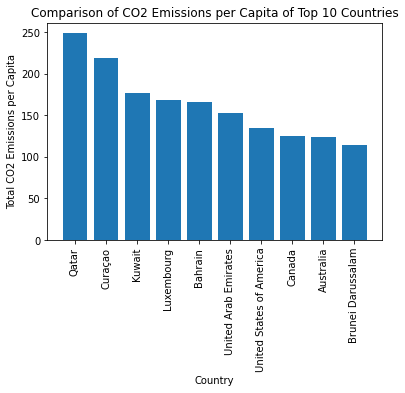

In [89]:
emission_per_capita_data_grouped = emission_per_capita_data.groupby('Region/Country/Area')['Value'].sum()

# Sort the countries by total emissions per capita
emission_per_capita_data_grouped = emission_per_capita_data_grouped.sort_values(ascending=False)

# Select the top N countries to compare
top_10_countries = emission_per_capita_data_grouped.head(10)

# Create a bar plot
plt.bar(top_10_countries.index, top_10_countries.values)
plt.xlabel('Country')
plt.ylabel('Total CO2 Emissions per Capita')
plt.title('Comparison of CO2 Emissions per Capita of Top 10 Countries')
plt.xticks(rotation = 90)
plt.show()

In [90]:
def plot_country_emissions_per_capita(country_name):
    country_data = emission_per_capita_data[emission_per_capita_data['Region/Country/Area'] == country_name]

    # Create a line plot of the data
    plt.plot(country_data['Year'], country_data['Value'])
    plt.xlabel('Year')
    plt.ylabel('CO2 Emissions per Capita (metric tons per capita)')
    plt.title(f'CO2 Emissions per Capita for {country_name}')
    plt.show()

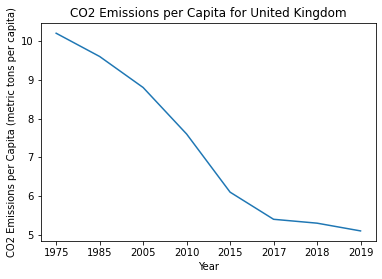

In [91]:
plot_country_emissions_per_capita("United Kingdom")